In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
exam=pd.read_csv("C:/Users/HP/Downloads/archive (48)/Exam_Score_Prediction.csv")
exam.head()
    

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


### *Data Overview*

##### 20,000 students.
##### Target: Pass (Pass / Fail) to be engneered
##### Numeric predictors: age, study_hours, class_attendance, sleep_hours, exam_score.
##### Categorical predictors: gender, course, internet_access, sleep_quality, study_method, facility_rating, exam_difficulty
##### shape 20000 rows × 13 columns
## =======================

### *Objectives*

##### 1.To check the data quality
##### 2.To understnd the relationships among all numeric columns
##### 3.To make comparisons between categorical columns inoder to understand the dataset
##### 4.To seee whether age,Study method,internet access,sleep Quality and attendance contributes to the Exam Score
##### 5.Do a logistic regression to predict the passes in future

## *Data Quality Checking*

In [2]:
exam.columns=exam.columns.str.strip()

In [3]:
exam['Pass']=exam['exam_score'].apply(lambda x:'Pass' if x>= 50 else 'Fail')

In [4]:
exam.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score,Pass
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9,Pass
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8,Pass
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3,Pass
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7,Fail
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7,Fail


In [5]:
exam.notna().sum()

student_id          20000
age                 20000
gender              20000
course              20000
study_hours         20000
class_attendance    20000
internet_access     20000
sleep_hours         20000
sleep_quality       20000
study_method        20000
facility_rating     20000
exam_difficulty     20000
exam_score          20000
Pass                20000
dtype: int64

In [6]:
exam.nunique()

student_id          20000
age                     8
gender                  3
course                  7
study_hours           784
class_attendance      589
internet_access         2
sleep_hours            59
sleep_quality           3
study_method            5
facility_rating         3
exam_difficulty         3
exam_score            805
Pass                    2
dtype: int64

In [37]:
exam.dtypes

student_id            int64
age                   int64
gender               object
course               object
study_hours         float64
class_attendance    float64
internet_access      object
sleep_hours         float64
sleep_quality        object
study_method         object
facility_rating      object
exam_difficulty      object
exam_score          float64
Pass                 object
dtype: object

In [38]:
exam.duplicated().sum()

np.int64(0)

In [39]:
exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
 13  Pass              20000 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 2.1+ MB


In [8]:
exam.describe()

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


In [40]:
exam.sort_values(by='exam_score',ascending=False)

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score,Pass
12640,12641,24,other,diploma,6.98,74.1,yes,7.1,good,mixed,high,hard,100.000,Pass
12653,12654,23,female,b.tech,7.91,96.3,yes,4.9,good,online videos,high,moderate,100.000,Pass
3913,3914,21,other,bba,7.09,99.4,yes,6.1,poor,mixed,medium,moderate,100.000,Pass
19936,19938,23,other,bba,7.00,85.2,yes,8.5,good,coaching,high,moderate,100.000,Pass
14302,14303,17,female,bba,7.43,55.7,no,8.5,good,coaching,high,moderate,100.000,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19896,19897,17,male,bba,1.44,48.5,no,7.9,poor,group study,low,easy,19.599,Fail
13605,13606,20,male,b.tech,0.50,41.8,yes,6.4,poor,self-study,low,hard,19.599,Fail
6660,6661,17,other,ba,0.12,75.3,yes,6.0,poor,group study,low,easy,19.599,Fail
10091,10092,24,other,diploma,1.88,49.0,yes,5.0,average,online videos,low,moderate,19.599,Fail


In [2]:
def analyze_columns(exam, columns):
    """
    This function takes a dataframe and a list of column names.
    It prints the unique values and their counts for each column.
    """
    for col in columns:
        print(f"\nColumn: {col}")
        print("Unique values:", exam[col].unique())
        print("Value counts:",exam[col].value_counts())
        #print(exam[col].value_counts())


In [3]:
# Example usage
analyze_columns(exam, ["gender", "course"])



Column: gender
Unique values: ['male' 'other' 'female']
Value counts: gender
other     6726
male      6695
female    6579
Name: count, dtype: int64

Column: course
Unique values: ['diploma' 'bca' 'b.sc' 'b.tech' 'bba' 'ba' 'b.com']
Value counts: course
bca        2902
ba         2896
b.sc       2878
b.com      2864
bba        2836
diploma    2826
b.tech     2798
Name: count, dtype: int64


In [4]:
def plot_categorical_counts(exam, columns):
    """
    Plots bar charts for categorical columns in a dataframe.
    df: the dataset (like exam)
    columns: list of column names to visualize
    """
    for col in columns:
        plt.figure(figsize=(6,4))
        ax=sns.countplot(data=exam, x=col, color='green')
        plt.title(f"Count of {col.capitalize()} Categories")
        for container in ax.containers:
            ax.bar_label(container,fmt='%d',label_type='edge',padding=0)
        plt.xlabel(col.capitalize())
        plt.ylabel("Count")
        plt.xticks(rotation=30)
        plt.show()

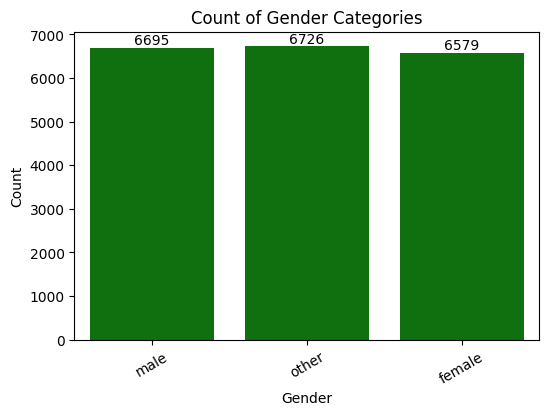

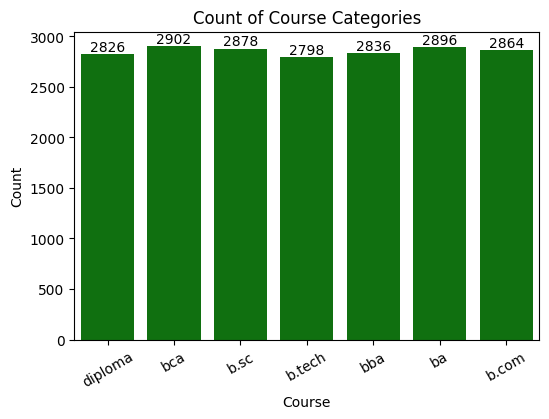

In [5]:
plot_categorical_counts(exam, ["gender", "course"])


In [9]:
exam.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score,Pass
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9,Pass
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8,Pass
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3,Pass
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7,Fail
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7,Fail


### *Checking for Outliers*

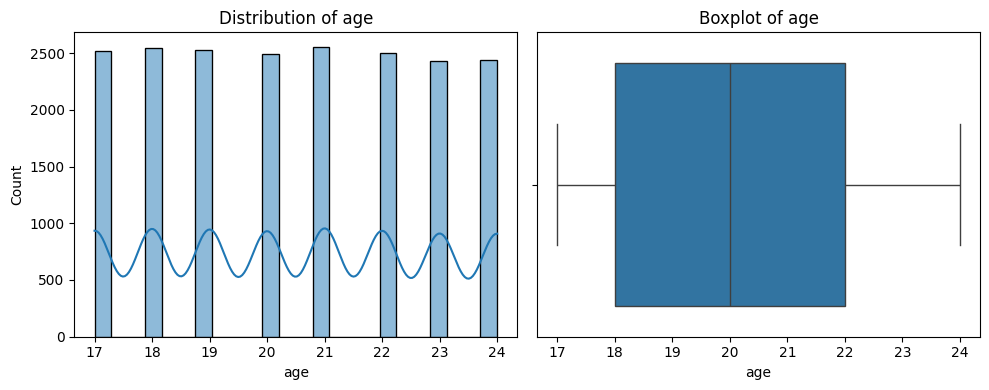

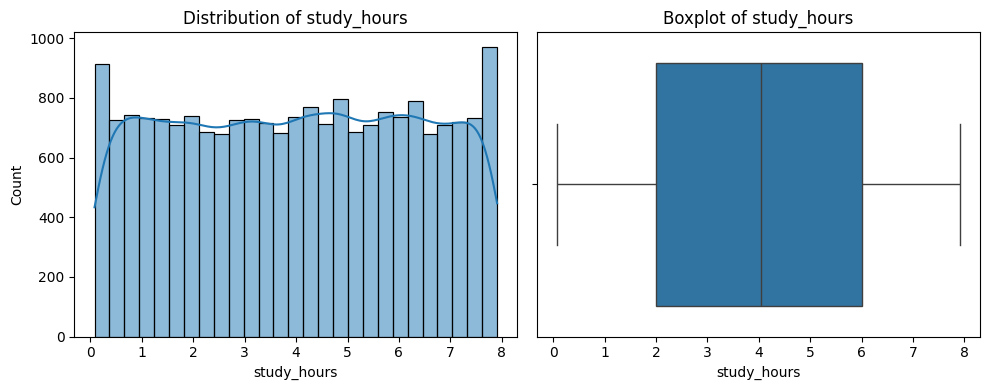

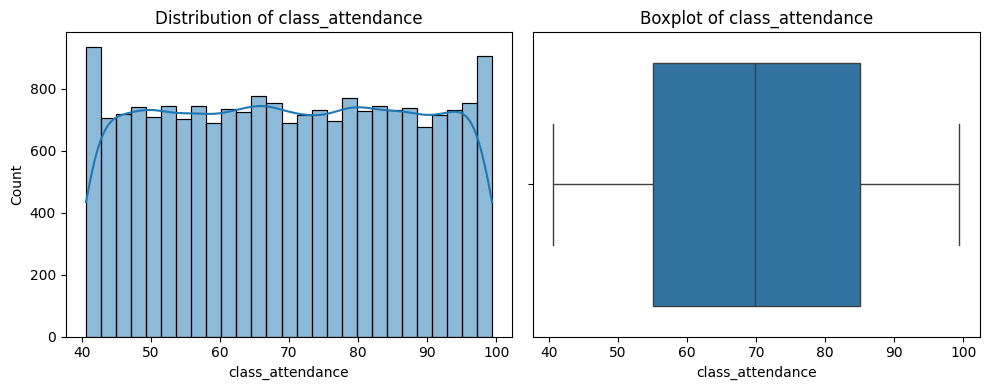

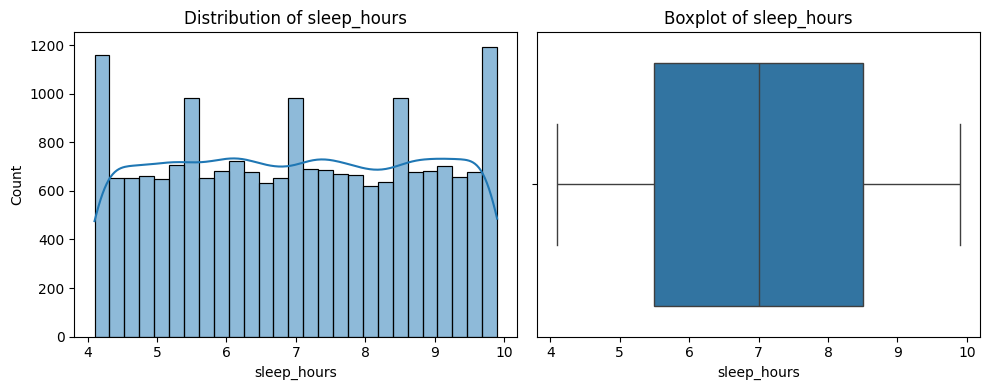

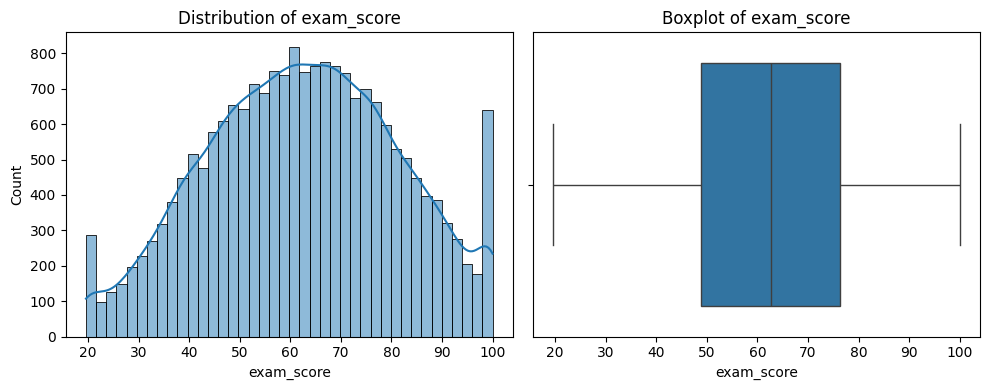

In [12]:


numeric_cols = ['age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score']

for col in numeric_cols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(exam[col], kde=True)
    plt.title('Distribution of ' + col)
    plt.subplot(1,2,2)
    sns.boxplot(x=exam[col])
    plt.title('Boxplot of ' + col)
    plt.tight_layout()
    plt.show()

#### <u>Interpretation of outliers</u>

##### Age: Likely clustered around early 20s, with no extreme outliers
##### Study hours: Some students study very little, some a lot; tails on the right are expected. Outliers here are plausible “hard workers” rather than data errors.
##### Class attendance: Bounded around 0–100; any outliers are just very low or very high attendance, still realistic.
##### Sleep hours: Typically 4–10 hours; tail behavior plausible.
##### Exam score: Looks like a reasonably continuous spread between low and high scores.
###### Given the plots, there are no obvious data-entry outliers (e.g., impossible values); what look like outliers are just extreme but plausible students
## ==============================================

### *EDA*

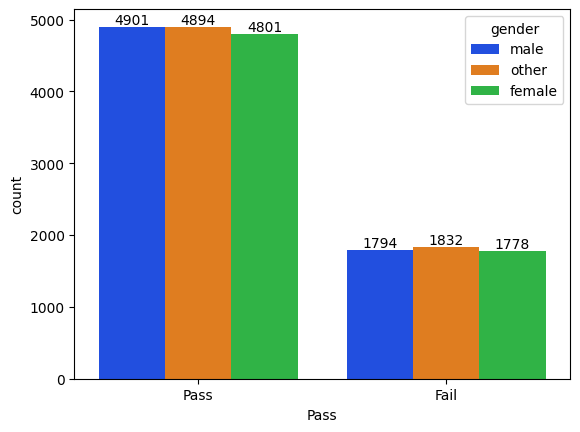

In [52]:

ax=sns.countplot(data=exam,x='Pass',hue='gender',palette='bright')
for container in ax.containers:
            ax.bar_label(container,fmt='%d',label_type='edge',padding=0)        

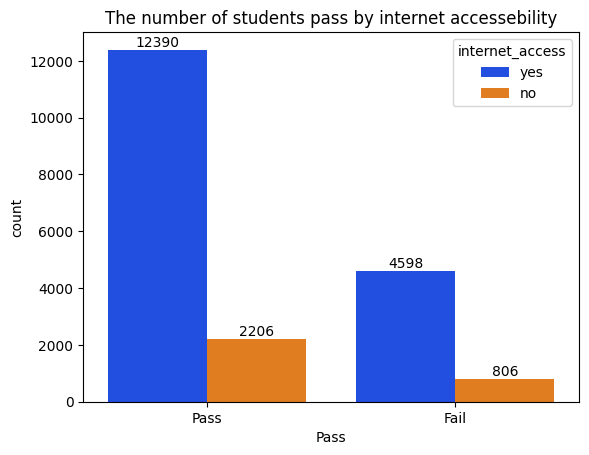

In [54]:
ax=sns.countplot(x=exam['Pass'],hue=exam['internet_access'],palette='bright')
for container in ax.containers:
    ax.bar_label(container,fmt='%d',label_type='edge',padding=0)
    plt.title('The number of students pass by internet accessebility')

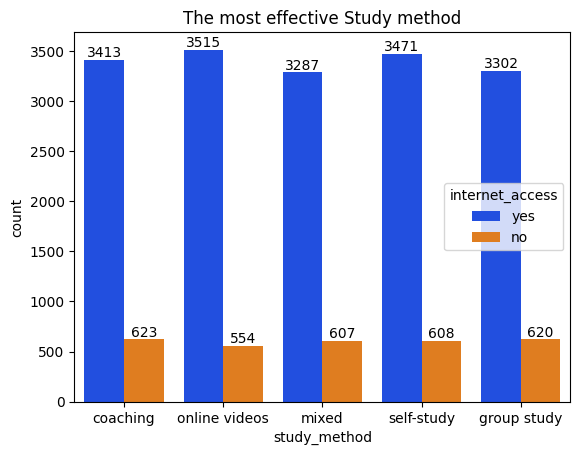

In [57]:
ax=sns.countplot(x=exam['study_method'],hue=exam['internet_access'],palette='bright')
for container in ax.containers:
    ax.bar_label(container,fmt='%d',label_type='edge',padding=0)
    plt.title('The most effective Study method')

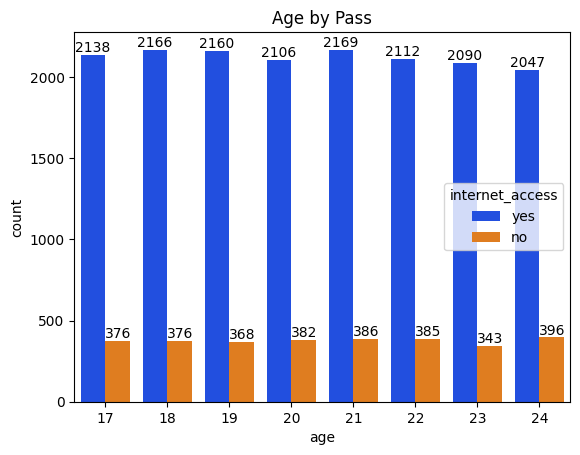

In [58]:
ax=sns.countplot(x=exam['age'],hue=exam['internet_access'],palette='bright')
for container in ax.containers:
    ax.bar_label(container,fmt='%d',label_type='edge',padding=0)
    plt.title('Age by Pass')

#### *Understnding the effect of Age on the Exam score*

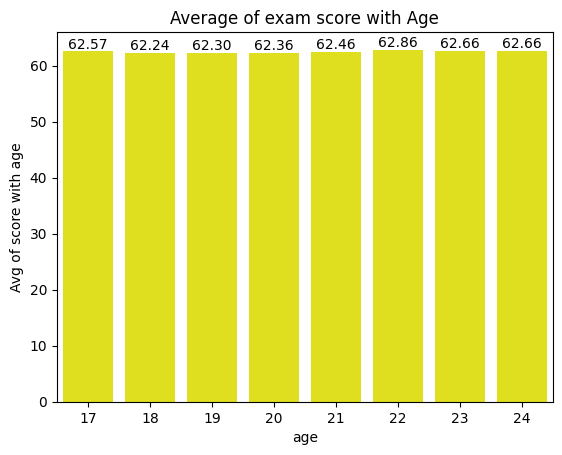

In [65]:
k=exam.groupby('age')['exam_score'].mean().reset_index()
ax=sns.barplot(data=k,x=k['age'].astype(str),y='exam_score',color='yellow')
plt.title('Average of exam score with Age')
plt.ylabel('Avg of score with age')
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f',label_type='edge',padding=0)

### Interpretation
##### *This shows Age of 17 ,23 and 24 have more average than other ages,this is might caused by peer pressure at the age of 18,19 and 20.Those with higher average they are now undrstanding life especially for 23 and 24 years and no peer pressure in age of 17.* 

### *Checking the relationships between numerical columns*

Text(0.5, 1.0, 'The relationship on all numeric Columns')

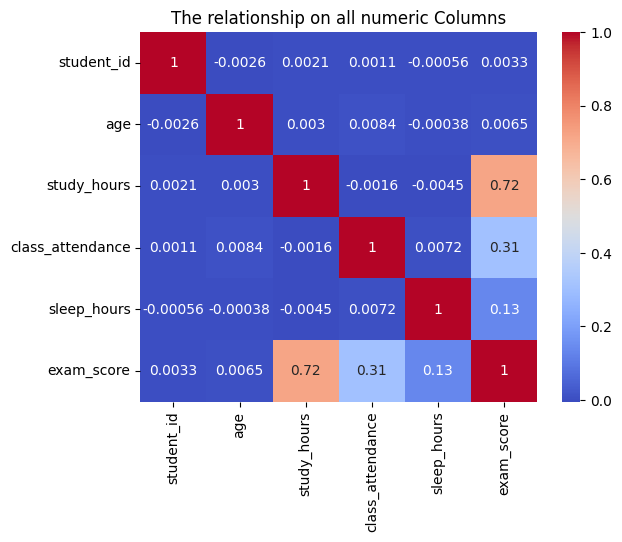

In [26]:
sns.heatmap(exam.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title('The relationship on all numeric Columns')

##### exam_score is correlated with:
##### study_hours (more hours -> higher score),
##### class_attendance (more attendance -> higher score).
##### Correlations are moderate, not extreme, so no serious multicollinearity issues among numeric features

In [10]:
exam['Pass_flag'] = exam['Pass'].map({'Pass':1, 'Fail':0})

In [11]:
exam.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score,Pass,Pass_flag
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9,Pass,1
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8,Pass,1
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3,Pass,1
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7,Fail,0
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7,Fail,0


### *A model to predict the future pass or fail using logistic regression*

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1081
           1       1.00      1.00      1.00      2919

    accuracy                           1.00      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       1.00      1.00      1.00      4000

[[1073    8]
 [   8 2911]]
ROC AUC: 0.9999521461197634


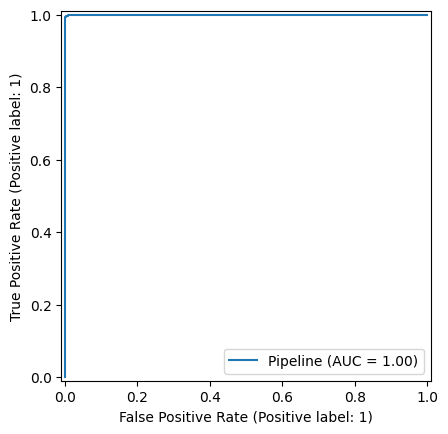

In [15]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

X = exam.drop(columns=['Pass', 'Pass_flag', 'student_id'])
y = exam['Pass_flag']

num_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])

log_reg = LogisticRegression(max_iter=1000)

clf = Pipeline(steps=[('preprocess', preprocess),
                     ('model', log_reg)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_prob))

RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

#### *<u>Interpretation</u>*

###### .Accuracy  ~100%.-
###### .Precision and recall for both classes (Pass and Fail) are ~ 0.99–1.00.
###### .Confusion matrix shows very few misclassifications.
###### .ROC AUC ~ 0.99995, which is extremely high.
###### **This means:**

###### The predictors (study habits, attendance, sleep, course,) are highly informative about passing or failing.
###### The underlying relationship between inputs and Pass/Fail is very nearly linearly separable in the transformed feature space.

#### *Comparison of original and predicted values*

In [27]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Get predictions and probabilities on the test set
y_pred_test = clf.predict(X_test_full)
y_prob_test = clf.predict_proba(X_test_full)[:, 1]

comparison_df = exam.loc[X_test_full.index].copy()
comparison_df['Predicted_Pass_flag'] = y_pred_test
comparison_df['Predicted_Prob_Pass'] = y_prob_test

comparison_df.head(7)

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score,Pass,Pass_flag,Predicted_Pass_flag,Predicted_Prob_Pass
7870,7871,17,female,b.tech,7.66,67.7,yes,4.5,average,mixed,medium,moderate,64.4,Pass,1,1,9.999998e-01
807,808,17,female,b.sc,6.56,99.1,yes,9.3,poor,mixed,low,moderate,87.5,Pass,1,1,1.000000e+00
12145,12146,17,female,b.tech,6.47,49.1,yes,4.6,good,group study,high,moderate,97.2,Pass,1,1,1.000000e+00
12613,12614,22,female,bba,1.53,58.8,yes,9.9,average,group study,low,hard,34.8,Fail,0,0,9.913538e-08
5248,5249,24,male,diploma,0.99,56.1,yes,8.2,poor,self-study,low,moderate,37.9,Fail,0,0,2.067229e-06
900,901,17,female,b.sc,3.41,68.9,yes,6.5,poor,self-study,high,moderate,53.2,Pass,1,1,9.733791e-01
12465,12466,23,male,ba,7.23,79.8,no,5.7,poor,self-study,high,moderate,83.6,Pass,1,1,1.000000e+00


In [10]:
from IPython.display import FileLink
FileLink("Exam_clean.csv")

C:\Users\HP\Exam_clean.csv

# ===================================================
### **<u>Summary of Dataset</u>**

### *Count of Candidates in each Course*

|course|Value counts|
|------|------------|
|bca    |    2902|
|ba       |  2896|
|b.sc    |   2878|
|b.com   |   2864|
|bba      |  2836|
|diploma   | 2826|
|b.tech     |2798|
# ===============================
### *Total of candidates by Gender*
|Value counts|gender|
|----------|--------|
|other   |  6726|
|male     | 6695|
|female   | 6579|
# ================================

#### *The counts of Passes*

|Value counts| Pass|
|-----------|-------|
|Pass  |  14596|
|Fail  |   5404|
# =====================================
### *Comparison of Passes with Gender*
|course	|gender|	Pass|	counts|
|-------|------|--------|---------|
|b.sc	|male	|Pass|	738|
|bca	|other	|Pass	|724|
|b.com	|male	|Pass	|722|
|b.tech	|female|	Pass|	721|
|bca|	male|	Pass|	720|
|diploma|	other	|Pass|	717|
|b.sc	|other	|Pass	|711|
|bba	|other|	Pass|	709|
|ba	|female	|Pass|	701|
|bba	|male|	Pass|	698|
|ba	|male	|Pass|	694|
|b.com|	female|	Pass|	694|
|ba	|other|	Pass|	692|
|diploma|	male|	Pass	|677|
|diploma|	female|	Pass|	676|
|bca	|female	|Pass|	674|
|b.com	|other	|Pass	|673|
|b.sc	|female	|Pass|	668|
|b.tech	|other	|Pass|	668|
|bba	|female	|Pass|	667|
|b.tech|male|	Pass|	652|
|ba	|female	|Fail	|282|
|bca|	other|	Fail|	281|
|b.com	|female|	Fail|	280|
|b.sc	|male|	Fail|	274|
|bba	|male|	Fail|	271|
|ba	|other	|Fail	|267|
|bba	|other	|Fail|	267|
|diploma|	other|	Fail|	263|
|ba|	male|	Fail|	260|
|b.tech	|other	|Fail|	258|
|b.sc|	other|	Fail	|257|
|b.com|	male|	Fail	|256|
|diploma	|female|	Fail|	254|
|b.tech	|female	|Fail|	254|
|bca	|female|	Fail|	254|
|bca|	male|	Fail|	249|
|b.tech|	male|	Fail|	245|
|diploma|	male	|Fail|	239|
|b.com	|other	|Fail|	239|
|b.sc	|female|	Fail|	230|
|bba	|female	|Fail|	224|

# =====================================
### *Number of students in Each Method of study*

|study_method|Value counts
|------------|------------|
|self-study     |  4079|
|online videos |   4069|
|coaching       |  4036|
|group study    |  3922|
|mixed          |  3894|
# ===================================
### *Number of students Pass and Fail in Each method of study*

|study_method |  Pass|count|
|-------------|-------|-----|
|coaching |      Pass  |  3344|
|mixed   |       Pass |   2983|
|online videos|  Pass |   2814|
|group study |   Pass   | 2758|
|self-study |  Pass   | 2697|
|self-study |     Fail |1382|
|online videos|  Fail   | 1255|
|group study |   Fail |   1164|
|mixed    |      Fail     |911|
|coaching   |    Fail   |  692|
# =====================================
##### *In my project, the dataset was of exam performance for 20,000 students. Initially, I searched for any missing values or errors in the data, which were absent. Hence, I proceeded with the entire dataset. Exploratory data analysis indicated a high correlation between the number of study hours, class attendance, and exam performance, while students who perform better in exams have a high chance of passing.*
##### *Next, I developed a logistic regression model to forecast whether or not a student would pass (Pass or Fail) based on both numerical and categorical variables. For numerical variables, I applied standardization and for categorical variables, I applied one-hot encoding. For evaluation, I used an 80-20 training and test split. The accuracy and F1-score on the test dataset were remarkably high at values close to 1.0 and an ROC AUC curve at approximately 0.99. This implies that this model is able to almost flawlessly distinguish between passing and failing students on this data. Finally, it is evident that hardworking and regular class attendance are major prompting factors in giving passing results in examinations*
##### *Study more -> attend more -> sleep reasonably -> score higher*
## ===============================================